# Setup Notebook

* **Colab Users:** Setup data location in your drive accordingly.
* **Local Setup**: Put the notebook into a folder with csv files and bypass the first cell.

In [1]:
## NOTE: 'Colab Users' only

# import drive 
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# move files to current folder
!mv 'drive/My Drive/IE582Fall2019_data_files/' .

# unzip all of the files
!unzip 'IE582Fall2019_data_files/bets.zip'
!unzip 'IE582Fall2019_data_files/booking.zip'
!unzip 'IE582Fall2019_data_files/goals.zip'
!unzip 'IE582Fall2019_data_files/matches.zip'
!unzip 'IE582Fall2019_data_files/stats.zip'

Mounted at /content/drive/
mv: inter-device move failed: 'drive/My Drive/IE582Fall2019_data_files/' to './IE582Fall2019_data_files'; unable to remove target: Directory not empty
Archive:  IE582Fall2019_data_files/bets.zip
replace bets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: bets.csv                
Archive:  IE582Fall2019_data_files/booking.zip
replace booking.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: booking.csv             
Archive:  IE582Fall2019_data_files/goals.zip
replace goals.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: goals.csv               
Archive:  IE582Fall2019_data_files/matches.zip
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: matches.csv             
Archive:  IE582Fall2019_data_files/stats.zip
replace stats.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: stats.csv               


In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
LEAGUE_ID = 148 # PREMIER LEAGUE ID

# Task #1

In [4]:
# read match csv data into pandas frame
matches = pd.read_csv('matches.csv')

# filter desired league matches
matches = matches[matches['league_id'] == LEAGUE_ID]

# select only desired score columns
matches = matches[['match_hometeam_score', 'match_awayteam_score']]

# visualize data for sanity check
matches.head()

,match_hometeam_score,match_awayteam_score
1,0,1
5,0,6
6,1,1
7,0,1
27,0,0


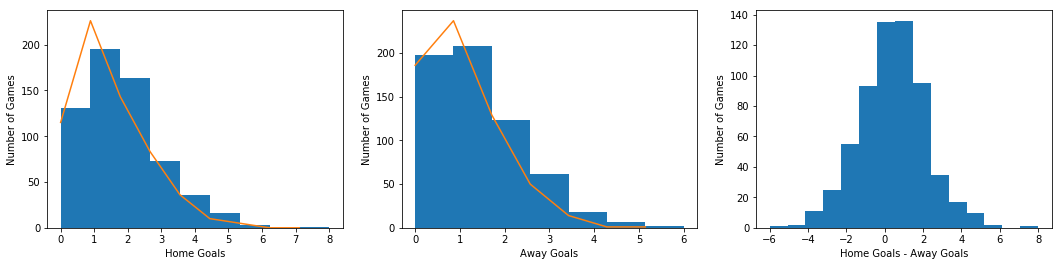

In [6]:
# create figure and axices
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# histogram & plot helper
def hist_plot(data, axis, plot_poisson=True):
    # calculate min / max of data
    data_min = data.min()
    data_max = data.max()

    # histogram data
    _, bins, _ = axis.hist(data, bins=data_max-data_min+1, range=(data_min, data_max))

    if plot_poisson:
        # poisson sampling
        data_mean = data.mean()
        poisson_rand = np.random.poisson(lam=data_mean, size=data.size)

        # histogram values into bins
        hist = np.histogram(poisson_rand, bins=bins)
        axis.plot(hist[1][:-1], hist[0])


# first plot
hist_plot(matches['match_hometeam_score'], axs[0])
axs[0].set_xlabel('Home Goals')
axs[0].set_ylabel('Number of Games')

# second plot
hist_plot(matches['match_awayteam_score'], axs[1])
axs[1].set_xlabel('Away Goals')
axs[1].set_ylabel('Number of Games')

# third plot
hist_plot(matches['match_hometeam_score'] - matches['match_awayteam_score'], axs[2], plot_poisson=False)
axs[2].set_xlabel('Home Goals - Away Goals')
axs[2].set_ylabel('Number of Games')

fig.show()